<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import function file necessary for running this notebook 
</p>

In [2]:
import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br>
    <span style="font-size: 22px; color: green;"> :: FACTS 1.0 run</span>
</span>

In [3]:
ssp='ssp585'
path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
print(df.to_string(index=False))

 Index                                                    File Name
     0     coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
     1    coupling.ssp585.ar5AIS.ipccar5.icesheets_EAIS_globalsl.nc
     2    coupling.ssp585.ar5AIS.ipccar5.icesheets_WAIS_globalsl.nc
     3  coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc
     4 coupling.ssp585.bamber19.bamber19.icesheets_EAIS_globalsl.nc
     5 coupling.ssp585.bamber19.bamber19.icesheets_WAIS_globalsl.nc
     6      coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc
     7     coupling.ssp585.deconto21.deconto21.AIS_EAIS_globalsl.nc
     8     coupling.ssp585.deconto21.deconto21.AIS_WAIS_globalsl.nc
     9       coupling.ssp585.emuAIS.emulandice.AIS_EAIS_globalsl.nc
    10        coupling.ssp585.emuAIS.emulandice.AIS_PEN_globalsl.nc
    11       coupling.ssp585.emuAIS.emulandice.AIS_WAIS_globalsl.nc
    12            coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc
    13           coupling.ssp585.larmip.larmip.A

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [4]:
#
start_year=2020; end_year=2100; unit='cm'; station=0


# AIS from Emulator module.
AIS_emu_path=f'{path}/coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc'
var = 'emu'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from Larmip module.
AIS_lar_path=f'{path}/coupling.ssp585.larmip.larmip.AIS_globalsl.nc'
var = 'lar'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")


# AIS from the IPCC AR5 module.
AIS_ar5_path=f'{path}/coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
var = 'ar5'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC Deconto_21 module.
AIS_d21_path=f'{path}/coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc'
var = 'd21'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Bamber 19 module.
AIS_b19_path=f'{path}/coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc'
var = 'b19'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [5]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [6]:
T1=2030; T2=2050; T3=2070; T4=2100

var = 'emu'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'lar'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'ar5'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'd21'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'b19'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Plot::
</span>
<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> emu AIS </span>

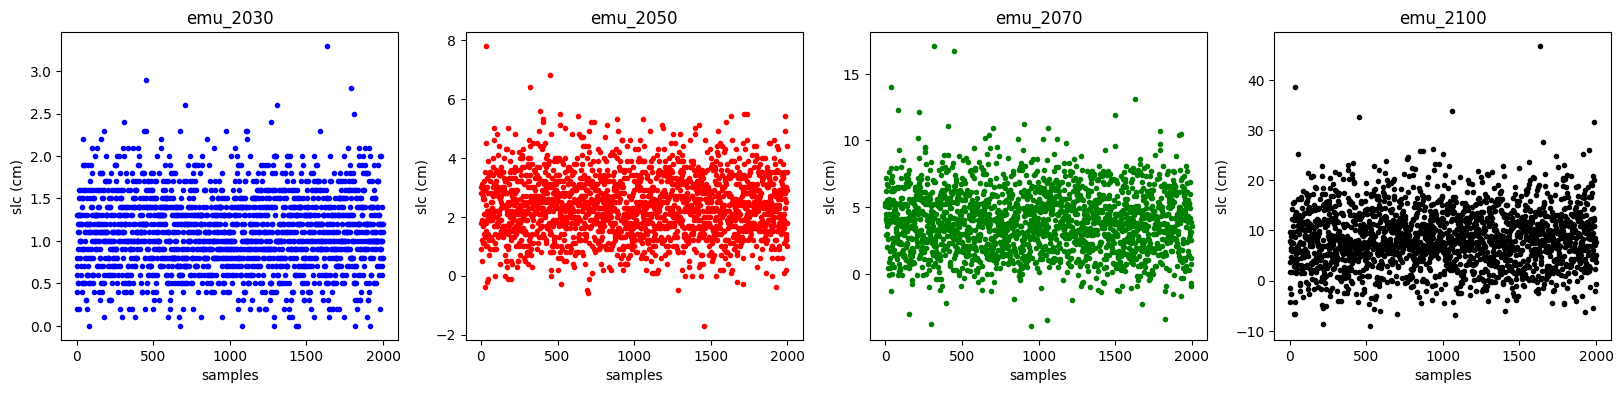

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'emu'; T1=2030; T2=2050; T3=2070; T4=2100
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> Larmip AIS </span>

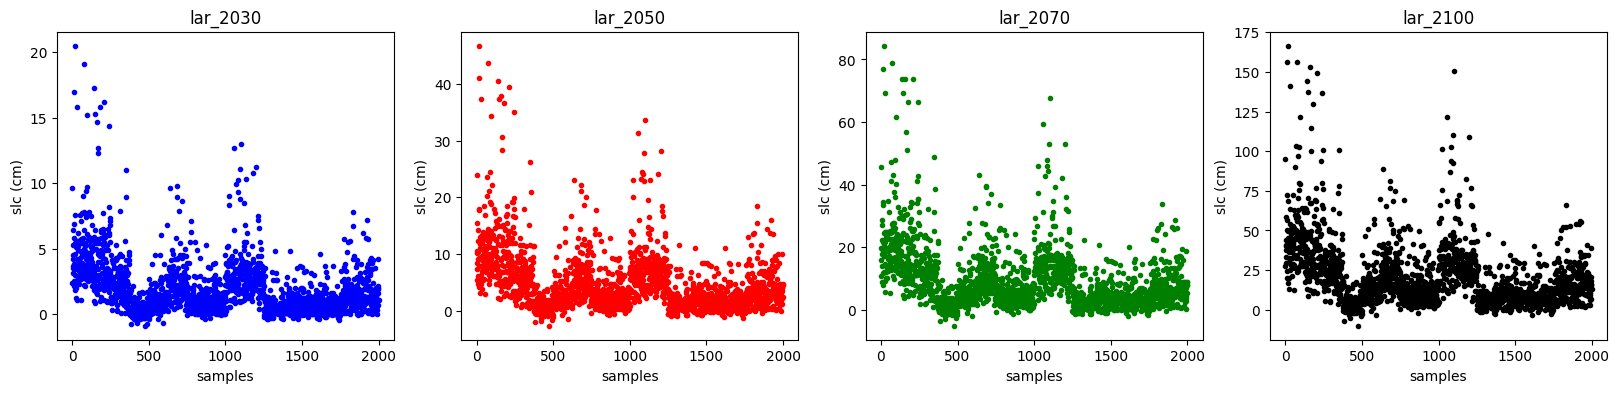

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'lar'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> AR5 AIS </span>

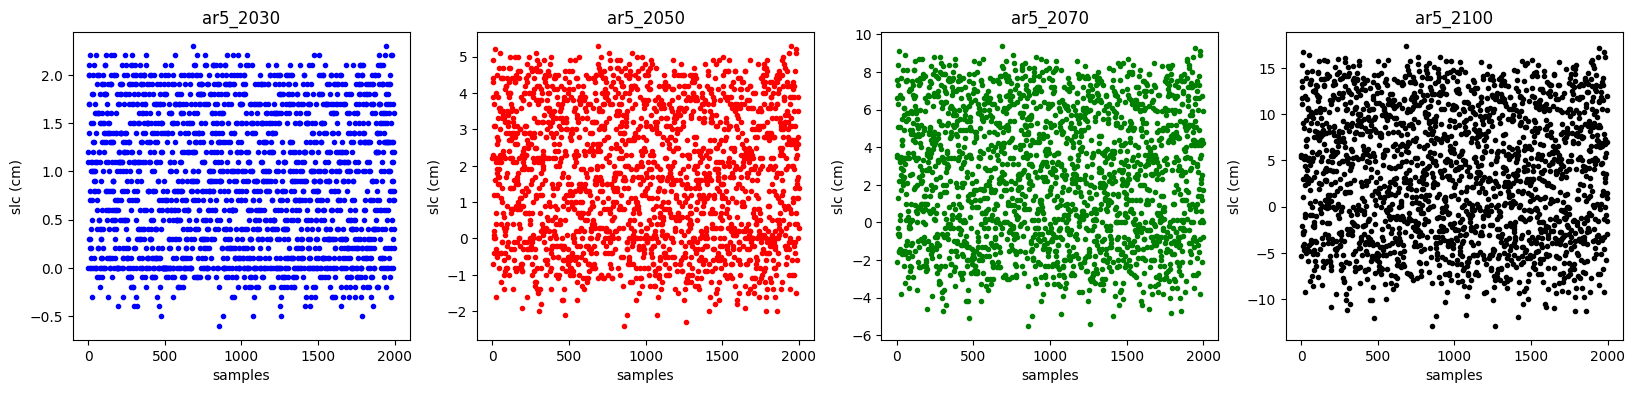

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'ar5'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> deconto 21 AIS </span>

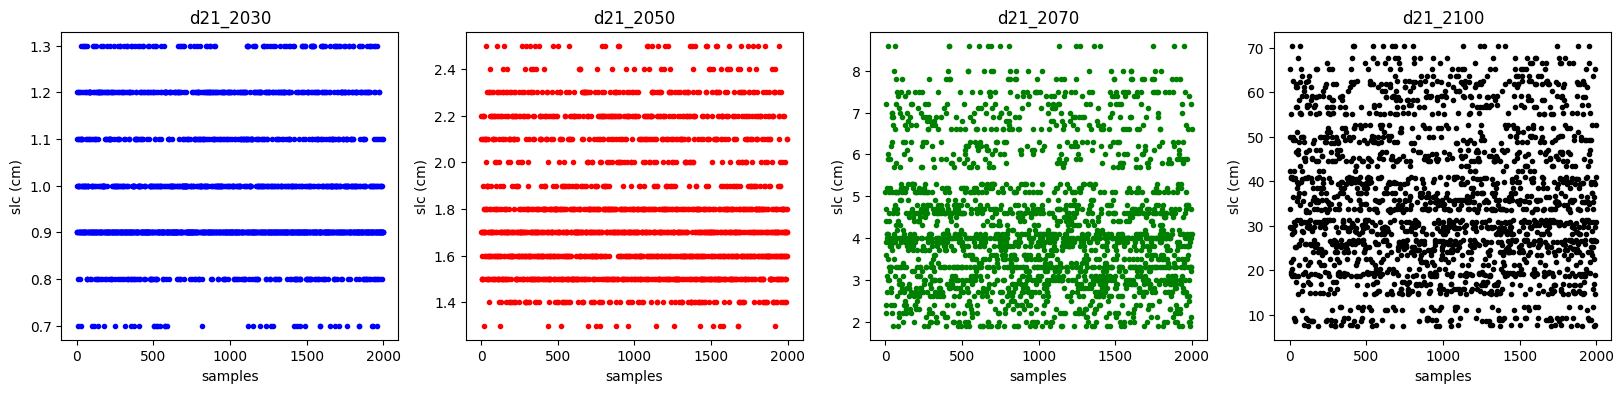

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'd21'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> bamber 19 AIS </span>

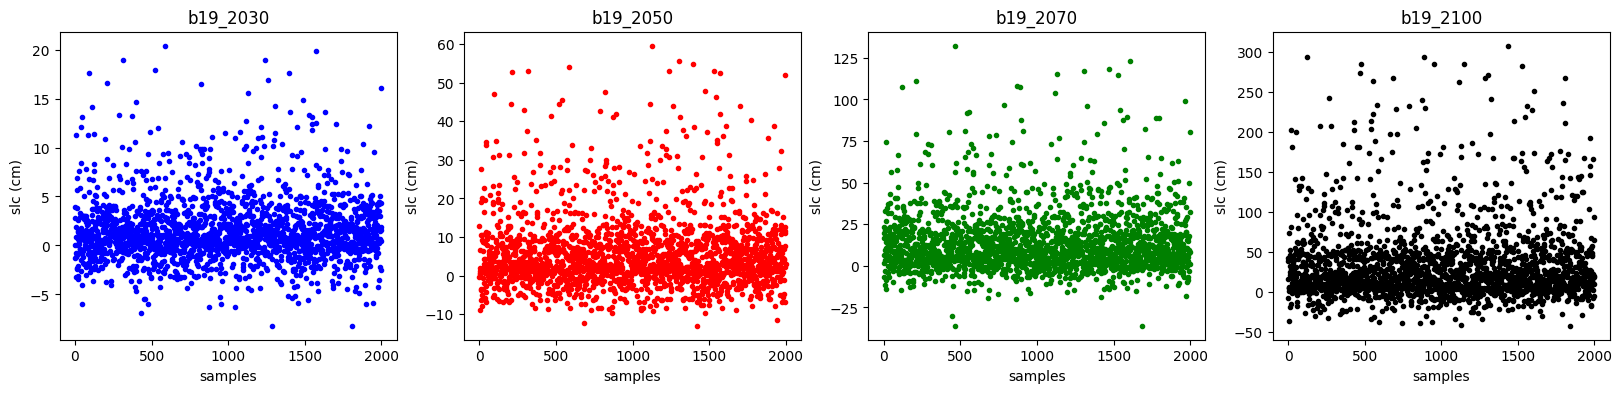

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'b19'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    PLOT PDF's 
</span>


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable log10 method

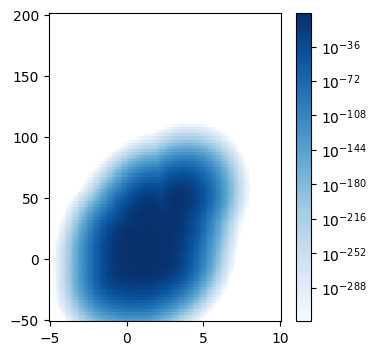

In [12]:
#
fig = plt.figure(figsize=(15, 4))
gs = fig.add_gridspec(1, 3)
fig.subplots_adjust(wspace=0.5, hspace=0.5) 
#
#
#
#
#--------------------------1--------------------------------------------
ax1 = fig.add_subplot(gs[0, 0])
VAR1=emu_2030
VAR2=emu_2100 
VAR_name='emu'
TVAR1 = 2030
TVAR2 = 2100
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,-5, 10, 100,
            -50, 200, 100,1e-3,'Blues', 5, 
            -5, 1, 10, 5, 
            -50, 1, 200,50, 'AIS',ax1,fig,)
#------------------------------2----------------------------------------
ax2 = fig.add_subplot(gs[0, 1])
VAR1=lar_2030
VAR2=lar_2100 
VAR_name='lar'
TVAR1 = 2030
TVAR2 = 2100
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,
            -5, 10, 100,-50, 200, 100,
            1e-3,'Reds', 5, 
            -5, 1, 10, 5, 
            -50, 1, 200,50, 'AIS',ax2,fig)
#-----------------------------3-----------------------------------------
ax3 = fig.add_subplot(gs[1, 0])
VAR1=d21_2030
VAR2=d21_2100 
VAR_name='d21'
TVAR1 = 2030
TVAR2 = 2100
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,
            -5, 10, 100,-50, 200, 100,
            1e-3,'Blues', 5, 
            -5, 1, 10, 5, 
            -200, 1, 1200,200, 'AIS',ax3,fig)
#-----------------------------4-----------------------------------------
ax4 = fig.add_subplot(gs[1, 1])
VAR1=b19_2030
VAR2=b19_2100 
VAR_name='b19'
TVAR1 = 2030
TVAR2 = 2100
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,
            -5, 10, 100,-50, 200, 100,
            1e-3,'Reds', 5, 
            -5, 1, 10, 5, 
            -200, 1, 1200,200, 'AIS',ax4,fig)
#----------------------------------------------------------------------